## Create a Row-wise stochastic matrix for mobility between regions

### David Clarabut (dclarabut@gmail.com)

In [14]:
## Import Modules: 

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# uncomment and update with notebook location if using Google Colab:
# from google.colab import drive
#drive.mount('/content/gdrive')
#%cd /content/gdrive/My\ Drive/Colab_Notebooks/stochastic-matrix-sudhi

#### Import Jed's Data

In [15]:
PHU_orig = np.loadtxt('i.csv',encoding='utf_8_sig')
PHU_dest = np.loadtxt('j.csv',encoding='utf_8_sig')
Weeks = np.loadtxt('Weeks.csv',encoding='utf_8_sig')
Flows = np.loadtxt('Flows.csv',encoding='utf_8_sig')
# Locations = np.loadtxt('locations.csv',encoding='utf_8_sig',dtype='str',usecols=0)
Locations = np.loadtxt('locations_sudhi.csv',encoding='utf_8_sig',dtype='str',usecols=0)
Locations_numbers = np.loadtxt('phu_numbers.csv',encoding='utf_8_sig')

#### Flow matrix based on Jed's data for all PHU's

In [16]:
Flowmat = np.empty((34,34,52))
Flowmat.fill(np.NaN) # initialize an array of NaN values. 
counter = 0
for i in range(0,len(Flows)):
    e1 = int(PHU_dest[i])-1 #destination PHU (on the y axis)
    e2 = int(PHU_orig[i])-1 #origin matrix (on the x-axis)
    e3 = int(Weeks[i])-1
    Flowmat[e1,e2,e3] = Flows[i]
Flowmat = Flowmat.astype(np.double) #This allows the nan's in the matrix to be masked later when we plot it. 

##### Flow Matrx for specific PHUs (Oakville, Hamilton, Brampton, Toronto)

In [17]:
# Toronto, Durham, York, Peel (31,2,30,18)
# Toronto, Ottawa, Windsor, Simcoe Muskoka (31,17,29,23)

Loc_list = [31,17] #enter the PHU numbers to compute the reduced flow matrix with.
num_locs = len(Loc_list)

Flowmat_reduced = np.empty((num_locs,num_locs,52))
Flowmat_reduced.fill(np.NaN)

for i in range(0,num_locs):
    for j in range(0,num_locs):
        cur_loc1 = Loc_list[i] #obtain the flow magnitudes for all weeks at the current itteration
        cur_loc2 = Loc_list[j]
        Flowmat_reduced[i,j,:] = Flowmat[cur_loc1,cur_loc2,:]
Flowmat_reduced = Flowmat_reduced.astype(np.double)
    

##### Plot of Flow Matrix (in absolute numbers)

In [5]:
## Heat map (absolute numbers) for the reduced flow matrix:

# week_list = np.arange(0,52,1)
# mpl.rcParams.update({'font.size':16})
# for i in week_list:
#     plt.figure(i,figsize=(8,8))
#     plt.imshow(Flowmat_reduced[:,:,i],cmap='turbo',vmax=200000,vmin=0)
#     plt.colorbar()
#     plt.xlabel('From region')
#     plt.ylabel('To Region')
#     plt.title('Week '+str(i+1))
#     #plt.savefig('HeatMap/'+str(i)+'.png',bbox_inches='tight')
#     #plt.close('all')

In [6]:
## Heat Map (All PHUs):

# week_list = np.arange(0,52,1)
# mpl.rcParams.update({'font.size':16})
# for i in week_list: 
#     plt.figure(i,figsize=(8,8))
#     plt.imshow(Flowmat[:,:,i],cmap='turbo',vmax=10000)
#     plt.colorbar()
#     plt.xlabel('From region')
#     plt.ylabel('To Region')
#     plt.title('Week '+str(i+1))
#     plt.savefig('HeatMap/'+str(i)+'.png',bbox_inches='tight')
#     plt.close('all')

##### Compute Stochastic Flow Matrix (row-wise):

In [18]:
Flowmat_reduced_stochastic = np.empty((num_locs,num_locs,52))
Flowmat_reduced_stochastic.fill(np.NaN)

for i in range(0,len(Flowmat_reduced[0,0,:])):
    for j in range(0,len(Loc_list)):
        cur_vec = (Flowmat_reduced[j,:,i])/np.sum(Flowmat_reduced[j,:,i])
        Flowmat_reduced_stochastic[j,:,i] = cur_vec

##### Plot Stochastic Flow Matrix

In [19]:
## Heat map (Stochastic Matrix) for the reduced flow matrix

week_list = np.arange(0,52,1)
mpl.rcParams.update({'font.size':14})


# for i in week_list:
#     plt.figure(i,figsize=(8,8))
#     c = plt.imshow(Flowmat_reduced_stochastic[:,:,i],cmap='turbo',vmax=1,vmin=0)
#     plt.colorbar()
#     myTicks = ([])
#     plt.xticks(myTicks)
#     plt.yticks(myTicks)
#     plt.xlabel('From region')
#     plt.ylabel('To Region')
#     plt.title('Week '+str(i+1))

#     ## Label with the phu numbers:
    
#     for ii in range(0,len(Loc_list)): #to region
#         for jj in range(0,len(Loc_list)): #from region
#             plt.annotate('From'+'\n'+str(Locations[Loc_list[ii]])+'\n to'+'\n'+str(Locations[Loc_list[jj]]), xy=(jj,ii),ha='center', va='center', color='white')
    
    # Save figures and stochastic matrices
#     plt.savefig('HeatMap_Stochastic/'+str(i)+'.eps',bbox_inches='tight')
#     plt.close('all')
    # np.savetxt('stochastic_Tor_Peel/'+'Stochastic_matrix'+str(i)+'.dat',Flowmat_reduced_stochastic[:,:,i])


Time Trace

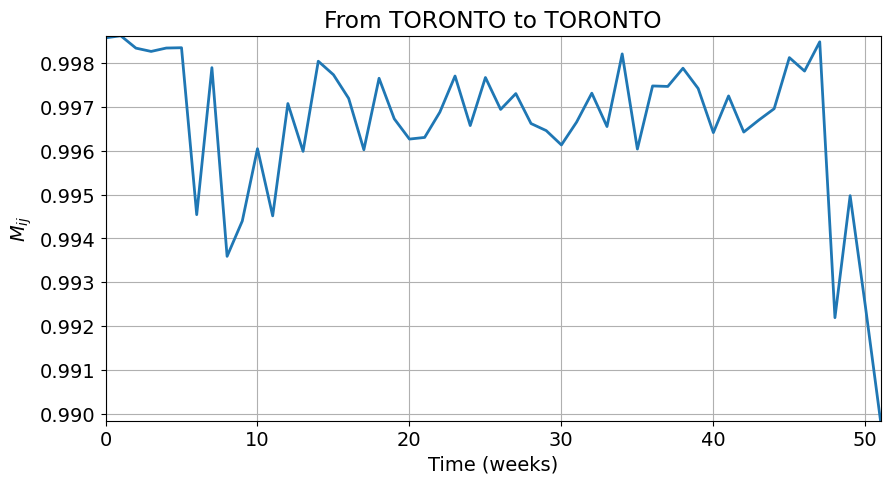

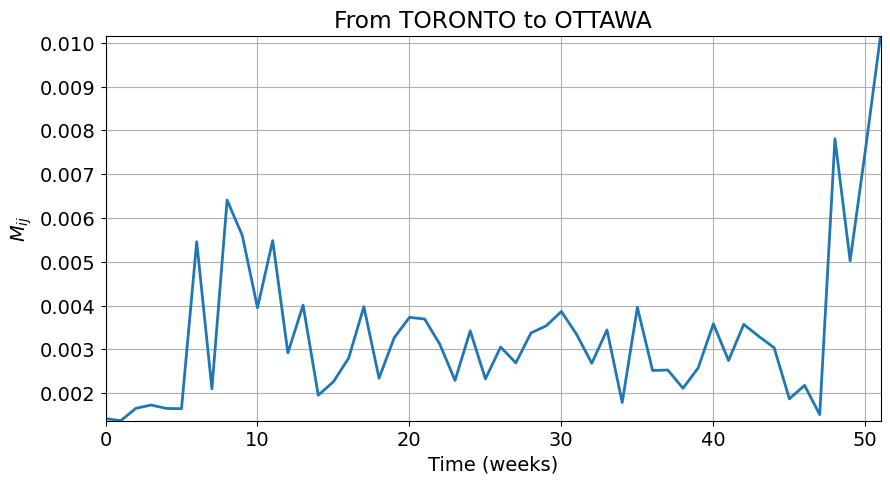

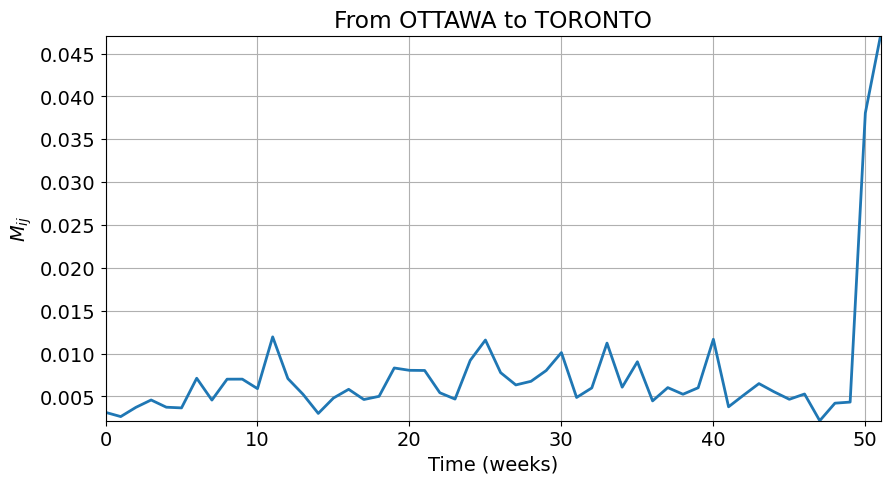

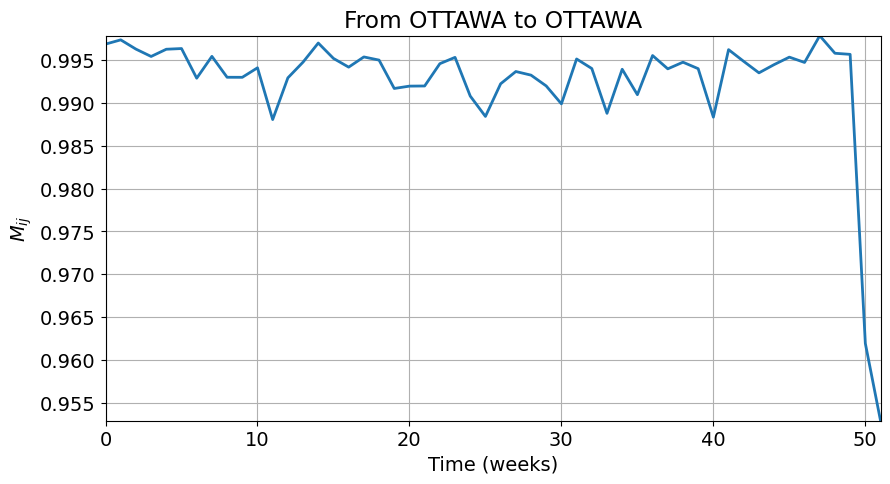

In [20]:
week_list = np.arange(0,52,1)
mpl.rcParams.update({'font.size':14})
for i in range(0,len(Loc_list)):
   for j in range(0,len(Loc_list)):
       plt.figure(i+j,figsize=(10,5))
       plt.plot(week_list,Flowmat_reduced_stochastic[i,j,:],linewidth=2)
       plt.grid(True)
       plt.title('From '+str(Locations[Loc_list[i]])+' to '+str(Locations[Loc_list[j]]))
       plt.xlabel('Time (weeks)')
    #    plt.ylabel('$M_{ij}$')
       plt.ylabel('$M_{ij}$')
       plt.autoscale(enable=True, tight=True)
       plt.savefig(f'./mobility_{i}_{j}.pdf')
       plt.show()